In [2]:
import numpy as np
import scipy
from activ import load_data
from activ.readfile import load_preprocessed, TrackTBIFile, encode
from activ.data_normalization import data_normalization
import pandas as pd
from sklearn import preprocessing
from collections import Counter
import h5py

In [4]:
subdata = load_data()
subdata_oc = subdata.outcomes
subdata_bm = subdata.biomarkers
oc_features = subdata.outcome_features
bm_features = subdata.biomarker_features
sub_features = np.hstack((subdata.biomarker_features, subdata.outcome_features))
ids = subdata.patient_ids

In [5]:
fulldata = load_preprocessed()
fulldata.shape        

(586, 918)

In [47]:
gose12 = fulldata[np.logical_or(fulldata.GOSE_OverallScore6M == 1.0, fulldata.GOSE_OverallScore6M == 2.0)]

In [150]:
gose12_ids = gose12.index

In [115]:
# one-hot encoding oc
gose12['GOSE_Reponder6M_Patient.alone'] = np.zeros(29)
gose12['GOSE_Reponder6M_Patient.plus.relative'] = [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [281]:
ids

array(['BR-1004', 'BR-1008', 'BR-1013', 'BR-1015', 'BR-1016', 'BR-1024',
       'BR-1025', 'BR-1031', 'BR-1032', 'BR-1037', 'BR-1041', 'BR-1048',
       'BR-1052', 'BR-1053', 'BR-1054', 'BR-1079', 'BR-1084', 'PI-1004',
       'PI-1008', 'PI-1009', 'PI-1011', 'PI-1013', 'PI-1015', 'PI-1019',
       'PI-1021', 'PI-1024', 'PI-1026', 'PI-1029', 'PI-1031', 'PI-1032',
       'PI-1033', 'PI-1034', 'PI-1039', 'PI-1042', 'PI-1043', 'PI-1044',
       'PI-1054', 'PI-1055', 'PI-1057', 'PI-1072', 'PI-1073', 'PI-1076',
       'PI-1077', 'PI-1079', 'PI-1080', 'PI-1081', 'PI-1084', 'PI-1086',
       'PI-1088', 'PI-1089', 'PI-1090', 'PI-1093', 'PI-1094', 'PI-1096',
       'PI-1105', 'PI-1107', 'PI-1108', 'PI-1109', 'PI-1111', 'PI-1112',
       'PI-1117', 'PI-1119', 'PI-1121', 'PI-1126', 'PI-1128', 'PI-1130',
       'PI-1132', 'PI-1143', 'PI-1144', 'PI-1154', 'PI-1155', 'PI-1156',
       'PI-1158', 'PI-1159', 'PI-1160', 'PI-1162', 'PI-1164', 'PI-1166',
       'PI-1180', 'SF-1002', 'SF-1010', 'SF-1011', 

In [441]:
for ii,c in enumerate(fulldata.columns):
    if 'WAIS' in c:
        print(c)
        

WAIS_PSI_SumOfScaled_6mo
WAIS_PSI_Composite_6mo
WAIS_PSI_Percentile_6mo
WAISSumOfScaledScores_12mo
WAIS_PSI_12mo
WAISPSIPercentileRank_12mo


In [437]:
fulldata.PTSD_6mo

BR-1001    NaN
BR-1003    NaN
BR-1004     No
BR-1006    NaN
BR-1007    NaN
BR-1008     No
BR-1009    NaN
BR-1010    NaN
BR-1011    NaN
BR-1012    NaN
BR-1013     No
BR-1014    NaN
BR-1015     No
BR-1016     No
BR-1017    NaN
BR-1018    NaN
BR-1019    NaN
BR-1020    NaN
BR-1021    NaN
BR-1023    NaN
BR-1024    Yes
BR-1025     No
BR-1026    NaN
BR-1027    NaN
BR-1028    NaN
BR-1029    Yes
BR-1030    NaN
BR-1031     No
BR-1032     No
BR-1033    NaN
          ... 
SF-1315    Yes
SF-1316    NaN
SF-1318     No
SF-1319     No
SF-1320     No
SF-1321    NaN
SF-1322     No
SF-1323    NaN
SF-1324     No
SF-1325    Yes
SF-1326     No
SF-1327    NaN
SF-1328     No
SF-1329    Yes
SF-1330    NaN
SF-1332    Yes
SF-1333    Yes
SF-1334    NaN
SF-1335     No
SF-1336    NaN
SF-1337    Yes
SF-1338    NaN
SF-1339    NaN
SF-1340     No
SF-1341    NaN
SF-1342    Yes
SF-1343     No
SF-1344    NaN
SF-1345     No
SF-1346    NaN
Name: PTSD_6mo, Length: 586, dtype: object

In [445]:
for ii,c in enumerate(oc_features):
    if 'CVLT' in c:
        print(c,ii)

CVLTTrial1RawScore_6mo 144
CVLTTrial1StandardScore_6mo 145
CVLTTrial2RawScore_6mo 146
CVLTTrial2StandardScore_6mo 147
CVLTTrial3RawScore_6mo 148
CVLTTrial3StandardScore_6mo 149
CVLTTrial4RawScore_6mo 150
CVLTTrial4StandardScore_6mo 151
CVLTTrial5RawScore_6mo 152
CVLTTrial5StandardScore_6mo 153
CVLTTrial1To5RawScore_6mo 154
CVLTTrial1To5StandardScore_6mo 155
CVLTTrialBRawScore_6mo 156
CVLTTrialBStandardScore_6mo 157
CVLTShortDelayFreeRecallRawScore_6mo 158
CVLTShortDelayFreeRecallStandardScore_6mo 159
CVLTShortDelayCuedRecallRawScore_6mo 160
CVLTShortDelayCuedRecallStandardScore_6mo 161
CVLTLongDelayFreeRecallRawScore_6mo 162
CVLTLongDelayFreeRecallStandardScore_6mo 163
CVLTLongDelayCuedRecallRawScore_6mo 164
CVLTLongDelayCuedRecallStandardScore_6mo 165
CVLTFreeRecallIntrusionsRaw_6mo 166
CVLTFreeRecallIntrusionsStandard_6mo 167
CVLTCuedRecallIntrusionsStandard_6mo 168
CVLTTotalIntrusionsRaw_6mo 169
CVLTTotalIntrusionsStandard_6mo 170
CVLTTotalRepetitionsRaw_6mo 171
CVLTTotalRepetitions

In [408]:
# Counter(subdata_oc[:,113])

In [474]:
scores = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
for i in scores: 
    idx = np.where(subdata_oc[:,32]==i)
    print(i,[subdata_oc[:,176][i] for i in idx])


3.0 [array([-1. , -1. , -1.5, -2. ])]
4.0 [array([-1. , -3.5, -2. ])]
5.0 [array([ 0.5, -1. , -1.5,  0.5, -1. ,  0.5,  0. , -1. ,  1.5, -1. , -1.5,
        0.5,  1. ,  1. ,  0.5, -1. ,  0. , -1.5,  0.5,  0.5,  1.5,  0.5,
       -0.5, -0.5,  0. , -0.5,  0. ,  1. , -1.5,  1. , -1. ,  1. ,  1.5,
       -2. ])]
6.0 [array([-2. ,  0.5, -0.5, -1.5, -1.5, -0.5, -0.5,  1.5,  0.5, -1.5,  1. ,
        0.5, -1. , -1. , -1.5,  0.5, -0.5, -0.5,  1.5,  1. ,  1. ,  0.5,
       -1. ,  1. ,  0.5, -0.5, -3.5, -0.5,  1. ,  0.5,  1. ,  1.5,  1. ,
        1. ,  1.5,  1. ,  1. ,  0. ,  0. , -0.5,  1. ,  0. ,  1. ,  1. ,
        1. , -1. ,  1. ])]
7.0 [array([ 0.5,  1.5,  1. , -1. ,  1. ,  0.5,  0. , -1.5,  1. , -1. ,  1. ,
        0. ,  0. ,  1. , -1.5, -1.5,  0. , -1. ,  0. , -1. ,  0.5, -2.5,
        0.5,  0.5,  1. ,  1. , -0.5, -0.5,  0. ,  0. ,  1.5, -1. , -1. ,
        0. ,  1. ,  0. , -1. ,  1. ,  1.5, -2.5,  0. ,  0. ,  1. ,  1. ,
        0. ,  1. ,  0. ,  1. ,  0.5, -1. ,  0. ,  1. ,  1. ,  1. ,  1.

In [388]:
[subdata_oc[:,100][i] for i in idx3], [subdata_oc[:,100][i] for i in idx8]

([array([2., 2., 0., 3.])],
 [array([3., 0., 3., 3., 3., 3., 0., 0., 3., 3., 3., 0., 3., 3., 3., 2., 3.,
         3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 0., 3., 3.,
         3., 3., 3., 1., 3., 3., 0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
         3., 3., 3., 3., 3., 3., 3., 3., 3., 0., 1., 3., 3., 3., 3., 3., 3.,
         3., 3., 3., 3., 2., 3., 3., 0., 3., 3., 3., 3.])])

In [263]:
oc_features

array(['GOSE_NeedAssistance3M', 'GOSE_WorkResume3M',
       'GOSE_DisruptRelation3M', 'GOSE_OtherIssues3M',
       'GOSE_OverallScore3M', 'NeuroPhysHeadache3mo',
       'NeuroPhysBalanceProbl3mo', 'NeuroPhysDizziness3mo',
       'NeuroPhysVisualProbl3mo', 'NeuroPhysFatigue3mo',
       'NeuroPhysLightSensitivity3mo', 'NeuroPhysNoiseSensitivity3mo',
       'NeuroPhysNumbnessTingling3mo', 'NeuroSleepDrowsiness3mo',
       'NeuroSleepSleepingLess3mo', 'NeuroSleepSleepingMore3mo',
       'NeuroSleepTroubleFallingAsleep3mo', 'NeuroCognitiveFoggy3mo',
       'NeuroCognitiveSlowedDown3mo',
       'NeuroCognitiveDiffConcentrating3mo',
       'NeuroCognitiveDiffRemembering3mo',
       'NeuroEmotionalMoreEmotional3mo', 'NeuroEmotionalNervousness3mo',
       'NeuroOverallRating3mo', 'GOSE_Reponder6M_Patient.alone',
       'GOSE_Reponder6M_Patient.plus.relative', 'GOSE_NeedAssistance6M',
       'GOSE_Travel6M', 'GOSE_SocialResume6M', 'GOSE_OtherIssues6M',
       'GOSE_Epilepsy6M', 'GOSE_EpilepsyRis

In [147]:
len(keep_cols)

389

In [143]:
bm_diff = sorted(list(set(bm_features).difference(keep_bm)))

In [144]:
bm_diff

['DispER_Discharge.Home',
 'DispER_ICU.Admit',
 'DispER_Operating.Room',
 'DispER_Stepdown.Admit',
 'DispER_Ward Admit',
 'PatientTypeCoded_ED.Discharge',
 'PatientTypeCoded_ICU.Admit',
 'PatientTypeCoded_Ward.Admit',
 'PresArrivalMethod_Ambulance',
 'PresArrivalMethod_Helicopter',
 'PresArrivalMethod_Walk.in',
 'RACE_3CAT_Black',
 'RACE_3CAT_Other',
 'RACE_3CAT_White',
 'cause_Assault',
 'cause_Fall',
 'cause_MV.car.',
 'cause_MV.cyclist.ped.',
 'cause_MV.motorcycle.',
 'cause_Other',
 'cause_Struck.By',
 'injurytype_Closed',
 'injurytype_Penetrating']

In [184]:
for c in fulldata.columns:
    if 'RACE' in c:
        print(c)

RACE_3CAT


In [187]:
Counter(fulldata.injurytype)

Counter({'Closed': 578, 'Blast': 1, 'Penetrating': 5, nan: 2})

In [188]:
gose12.injurytype

BR-1043         Closed
BR-1078         Closed
PI-1014         Closed
PI-1020         Closed
PI-1046         Closed
PI-1051         Closed
PI-1052         Closed
PI-1053         Closed
PI-1061         Closed
PI-1065         Closed
PI-1091         Closed
PI-1098         Closed
PI-1113         Closed
PI-1131         Closed
PI-1137         Closed
PI-1145         Closed
PI-1161         Closed
PI-1175         Closed
SF-1009         Closed
SF-1073         Closed
SF-1118         Closed
SF-1129    Penetrating
SF-1130         Closed
SF-1162         Closed
SF-1168         Closed
SF-1211         Closed
SF-1267         Closed
SF-1271         Closed
SF-1316         Closed
Name: injurytype, dtype: object

In [190]:
np.where(gose12.injurytype == 'Penetrating')

(array([21]),)

In [191]:
# one-hot encoding bm

gose12['cause_Assault'] = [0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0]
gose12['cause_Fall'] = [1,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0]
gose12['cause_MV.car.'] = [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1]
gose12['cause_MV.cyclist.ped.'] = [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]
gose12['cause_MV.motorcycle.'] = np.zeros(29)
gose12['cause_Other'] = np.zeros(29)
gose12['cause_Struck.By'] = np.zeros(29)
gose12['DispER_Discharge.Home'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
gose12['DispER_ICU.Admit'] = [0,1,0,1,1,0,1,0,1,1,1,1,0,1,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0]
gose12['DispER_Operating.Room'] = [0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0]
gose12['DispER_Stepdown.Admit'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0]
gose12['DispER_Ward Admit'] = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0]
gose12['PatientTypeCoded_ED.Discharge'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
gose12['PatientTypeCoded_ICU.Admit'] = [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0]
gose12['PatientTypeCoded_Ward.Admit'] = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0]
gose12['PresArrivalMethod_Ambulance'] = [1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1]
gose12['PresArrivalMethod_Helicopter'] = [0,1,0,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0]
gose12['PresArrivalMethod_Walk.in'] = np.zeros(29)
gose12['RACE_3CAT_Black'] = np.zeros(29)
gose12['RACE_3CAT_Other'] = np.zeros(29)
gose12['RACE_3CAT_White'] = np.ones(29)
gose12['injurytype_Closed'] = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1]
gose12['injurytype_Penetrating'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [225]:
keep_cols = np.asarray(list(set(sub_features).intersection(gose12.columns)))
gose12_oc_features = np.asarray(list(set(keep_cols).intersection(oc_features)))
gose12_bm_features = np.asarray(list(set(keep_cols).intersection(bm_features)))

In [226]:
len(gose12_oc_features), len(gose12_bm_features)

(177, 235)

In [204]:
drop_cols = list(set(gose12.columns).difference(keep_cols))

In [208]:
gose12.columns.shape

(943,)

In [223]:
gose12 = gose12.drop(columns = drop_cols)

In [228]:
gose12.shape
gose12_bm = gose12.drop(columns = gose12_oc_features)
gose12_oc = gose12.drop(columns = gose12_bm_features)

In [229]:
gose12_bm.shape, gose12_oc.shape

((29, 235), (29, 177))

In [256]:
pd.DataFrame(gose12_bm).to_csv("/Users/ahyeon/Desktop/activ misc/gose12_bm.csv")

In [250]:
gose12_bm_encode = encode_bm(gose12_bm)
gose12_oc_encode = encode_oc(gose12_oc)

In [257]:
pd.DataFrame(gose12_bm_encode).to_csv("/Users/ahyeon/Desktop/activ misc/gose12_bm_encode.csv")

In [262]:
pd.DataFrame(gose12_oc).to_csv("/Users/ahyeon/Desktop/activ misc/gose12_oc.csv")
pd.DataFrame(gose12_oc_encode).to_csv("/Users/ahyeon/Desktop/activ misc/gose12_oc_encode.csv")

In [522]:
gose12_oc_imputed = pd.read_csv('/Users/ahyeon/Desktop/activ misc/gose12_oc.csv')

In [523]:
gose12_oc_imputed = encode_oc(gose12_oc_imputed)

In [532]:
np.isnan(gose12_bm_encode).sum().sum()

79

In [524]:
new = np.asarray(gose12_oc_imputed)


In [566]:
gose12_oc_plain = pd.read_csv('/Users/ahyeon/Desktop/activ misc/gose12_oc.csv')
gose12_bm_plain = pd.read_csv('/Users/ahyeon/Desktop/activ misc/gose12_bm.csv')

In [569]:
gose12_bm_plain.shape

(28, 236)

In [564]:
gose12_oc_plain = np.asarray(gose12_oc_plain)

In [560]:
gose12_bm_plain = gose12_oc_plain[:,1:]

In [570]:
gose12_bm_encode = encode_oc(gose12_bm_plain)

In [574]:
gose12_bm_encode = np.asarray(gose12_bm_encode)

In [575]:
gose12_bm_encode = gose12_bm_encode[:,1:]

In [578]:
gose12_bm_encode

0

In [579]:
gose12_oc_encode = encode_oc(gose12_oc_plain)


In [580]:
gose12_oc_encode = np.asarray(gose12_oc_encode)

In [581]:
gose12_oc_encode = gose12_oc_encode[:,1:]

In [2]:
added_oc = np.vstack((subdata_oc, gose12_oc_encode))

NameError: name 'np' is not defined

In [1]:
added_oc

NameError: name 'added_oc' is not defined

In [589]:
added_bm = np.vstack((subdata_bm, gose12_bm_encode))

In [590]:
added_bm.shape

(275, 235)

In [602]:
gose12_ids = gose12_bm_plain.iloc[:,0].values

In [604]:
added_ids = np.hstack((ids, gose12_ids))

In [608]:
fname = '/Users/ahyeon/data/activ/gose1and2.h5'
TrackTBIFile.write(fname, added_bm, added_oc, biomarker_features = gose12_bm_features, outcome_features = gose12_oc_features, patient_ids=added_ids)

In [5]:
mask = pd.read_csv('/Users/ahyeon/Desktop/TBIanalysis/data/mask_feature_outcome.txt', header=None)
mask = mask.values
len(mask)

918

In [6]:
bm_mask = np.where(mask==0)[0]
oc_mask = np.where(mask==1)[0]

In [7]:
oc_mask

array([329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341,
       342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354,
       355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367,
       368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380,
       381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393,
       394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406,
       407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419,
       420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432,
       433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445,
       446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458,
       459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471,
       472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484,
       485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497,
       498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 50

In [8]:
data = load_preprocessed()
data.shape

(586, 918)

In [9]:
full_bm = np.asarray(data.columns[bm_mask])
full_oc = np.asarray(data.columns[oc_mask])
len(full_bm), len(full_oc)

(524, 394)

In [140]:
idx = [i for i, x in enumerate(data.columns) if 'GOSE_Overall' in x]

In [141]:
data.iloc[:, idx]

,GOSE_OverallScore3M,GOSE_OverallScore6M,GOSE_OverallScore12M
BR-1001,NaN,NaN,NaN
BR-1003,NaN,NaN,NaN
BR-1004,8.0,8.0,NaN
BR-1006,NaN,NaN,NaN
BR-1007,NaN,NaN,NaN
BR-1008,6.0,5.0,4.0
BR-1009,7.0,NaN,NaN
BR-1010,NaN,NaN,6.0
BR-1011,NaN,NaN,NaN
BR-1012,5.0,NaN,NaN


In [167]:
temp = data[np.logical_or(data['GOSE_OverallScore3M']==1.0, data['GOSE_OverallScore3M']==2.0)].iloc[:,oc_mask]

temp.isnull().sum().sum()/np.product(temp.shape)

0.9738672682835119

In [10]:
data_bm = data[full_bm]
data_oc = data[full_oc]
data_bm.shape

(586, 524)

In [233]:
def encode_bm(df, get_binvars=False):
    import pandas as pd
    from sklearn.preprocessing import LabelEncoder, LabelBinarizer
    cols = dict()
    enc = LabelEncoder()
    lb = LabelBinarizer()
    binvars = dict()
    for colname, coltype in df.dtypes.items():
        if coltype == object:
            newcol = enc.fit_transform(df[colname].astype(str))
            if len(enc.classes_) > 2:
                newcols = lb.fit_transform(newcol)
                for i, c in enumerate(newcols.T):
                    name = "%s=%s" % (colname, enc.classes_[lb.classes_[i]])
                    cols[name] = c
            else:
                cols[colname] = newcol
                binvars[colname] = enc.classes_
        else:
            cols[colname] = df[colname]
    newdf = pd.DataFrame(cols, index=df.index)
    if get_binvars:
        return newdf, binvars
    else:
        return newdf

In [249]:
def encode_oc(df, get_binvars=False):
    import pandas as pd
    from sklearn.preprocessing import LabelEncoder, LabelBinarizer
    cols = dict()
    enc = LabelEncoder()
    lb = LabelBinarizer()
    binvars = dict()
    for colname, coltype in df.dtypes.items():
        if coltype == object:
            newcol = enc.fit_transform(df[colname].astype(str))
            cols[colname] = newcol
            binvars[colname] = enc.classes_
        else:
            cols[colname] = df[colname]
    newdf = pd.DataFrame(cols, index=df.index)
    if get_binvars:
        return newdf, binvars
    else:
        return newdf

In [92]:
newdata_bm = encode_bm(data_bm)

In [4]:
newdata_bm.shape

NameError: name 'newdata_bm' is not defined

In [93]:
newdata_oc = encode_oc(data_oc)

In [94]:
len(newdata_bm.columns), len(newdata_oc.columns)

(830, 394)

In [96]:
TrackTBIFile.write('/Users/ahyeon/Desktop/TBIanalysis/data/fulldata.h5', newdata_bm, newdata_oc, biomarker_features=newdata_bm.columns, outcome_features=newdata_oc.columns)

In [97]:
for ii,c in enumerate(newdata_oc.columns):
    if 'GOSE_Overall' in c:
        print(c,ii)

GOSE_OverallScore3M 24
GOSE_OverallScore6M 77
GOSE_OverallScore12M 287


In [114]:
gose3m = newdata_oc.iloc[:,24].fillna(0).values.astype(int)
gose6m = newdata_oc.iloc[:,77].fillna(0).values.astype(int)
gose12m = newdata_oc.iloc[:,287].fillna(0).values.astype(int)

In [125]:
from collections import Counter
Counter(gose3m)



Counter({0: 130, 8: 129, 6: 72, 7: 133, 5: 53, 4: 20, 3: 22, 1: 25, 2: 2})

In [126]:
newdata_oc[gose3m==1]

,MR_result,GOSE_Responder3M,GOSE_SimpleCommand3M,GOSE_NeedAssistance3M,GOSE_NeedFreqHelp3M,GOSE_AssistanceBaseline3M,GOSE_Shop3M,GOSE_ShopBaseline3M,GOSE_Travel3M,GOSE_TravelBaseline3M,...,CVLTFreeRecallIntrusionsStandard_12mo,CVLTCuedRecallIntrusionsRaw_12mo,CVLTCuedRecallIntrusionsStandard_12mo,CVLTTotalIntrusionsRaw_12mo,CVLTTotalIntrusionsStandard_12mo,CVLTTotalRepetitionsRaw_12mo,CVLTTotalRepetitionsStandard_12mo,CVLTTotalRecognitionHitsRawScore_12mo,CVLTTotalRecognitionHitsStandardScore_12mo,CVLTTotalRecognitionDiscriminabilityRawScore_12mo
BR-1043,NaN,3,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BR-1078,NaN,3,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PI-1014,NaN,3,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PI-1020,NaN,3,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PI-1051,NaN,3,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PI-1052,NaN,3,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PI-1053,1.0,3,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PI-1061,NaN,3,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PI-1065,NaN,3,2,2,2,2,2,2,2,2,...,4.0,16.0,5.0,28.0,5.0,1.0,-1.0,15.0,0.0,1.0
PI-1091,1.0,3,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
count=0
patients3m = []
patients6m = []
patients1 = []
patients2 = []

for i in range(586):
    if gose3m[i] == 1 or gose3m[i] == 2:
        patients3m.append(i)
    if gose3m[i] ==1:
        patients1.append(i)
    if gose3m[i]==2:
        patients2.append(i)
    count+=1
print(len(patients3m))
bm_gose3m = np.zeros((len(patients3m), newdata_bm.shape[1]))
oc_gose3m = np.zeros((len(patients3m), newdata_oc.shape[1]))
for ii,p in enumerate(patients3m):
    bm_gose3m[ii,:] = newdata_bm.iloc[p,:]
    oc_gose3m[ii,:] = newdata_oc.iloc[p,:]
print(bm_gose3m.shape)
print(oc_gose3m.shape)

27
(27, 830)
(27, 394)


In [121]:
fname = '/Users/ahyeon/data/activ/gose1and2.h5'
TrackTBIFile.write(fname, bm_gose3m, oc_gose3m)

In [1]:
247+27

274

In [78]:
## shuffle data

fname = '/Users/ahyeon/data/activ/gose1and2.h5'
f = h5py.File(fname, 'r')
bm = f['biomarkers'][:]
bm_names = f['biomarker_features'][:].astype(str)
oc = f['outcomes'][:]
oc_names = f['outcome_features'][:].astype(str)
ids = f['patient_ids'][:].astype(str)

In [73]:
from sklearn.utils import shuffle

In [74]:
bm_shuffle, oc_shuffle, id_shuffle = shuffle(bm,oc,ids)

In [81]:
fname_shuffled = '/Users/ahyeon/data/activ/gose1and2_shuffled.h5'
TrackTBIFile.write(fname_shuffled, bm_shuffle, oc_shuffle, biomarker_features = bm_names, outcome_features=oc_names, patient_ids=id_shuffle)

## GOSE 1 and 2 Addition Accuracy Plots

In [3]:
from activ import load_data, data_normalization
%matplotlib inline
import matplotlib.pyplot as plt
from activ.analytics import heatmap, nmf_bases_heatmap
from matplotlib.backends.backend_pdf import PdfPages
from IPython.display import display, Latex, Markdown
from scipy.stats import norm, sem
from scipy.stats import iqr
from scipy import interpolate

In [4]:
def conf_alliter(size, predicted, actual):
    confalliter = []
    for j in range(50):
        conf = np.zeros((size,size))
        labs = list(map(int, actual[j][size-2]))
        preds = list(map(int, predicted[j][size-2]))
        for l, p in zip(labs, preds):
            conf[l,p] += 1
        confalliter.append(conf)
    return confalliter

def accuracy(mat):
    return mat.trace()/mat.sum()

In [95]:
# all outcomes and biomarkers


path = '/Users/ahyeon/Desktop/activ misc/gose1and2_results.h5'
f = h5py.File(path, 'r')
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
print(predictions.shape)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    print(norm_all50mat[0].shape)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc


# plt.rcParams["figure.figsize"] = [10,10]
# cmap = plt.get_cmap("tab10")
# lower = [np.percentile(fold_over_chance[i,:], 25) for i in range(49)]
# upper = [np.percentile(fold_over_chance[i,:], 75) for i in range(49)]
# med = np.median(fold_over_chance, axis=1)
# raw_med = np.median(raw_acc, axis=1)
# raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(49)]
# raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(49)]
# norm_med = np.median(normalized_acc, axis=1)
# norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(49)]
# norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(49)]

# # plt.ylim((1, 4.5))
# plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')
# plt.errorbar(cluster_sizes, raw_med, yerr=[raw_med-raw_lower,raw_upper-raw_med], color='black',fmt='-o', label='Raw accuracy')
# plt.errorbar(cluster_sizes, norm_med, yerr=[norm_med-norm_lower, norm_upper-norm_med], color='grey',fmt='-o', label='Chance accuracy')


# plt.title("GOSE 1 and 2 Patients Included (275 Patients Total)\nFold over Chance by cluster size across all iterations\nNo Features Dropped")
# plt.xlabel("Cluster sizes")
# plt.ylabel("Fold over chance")
# plt.legend()

# # plt.savefig('/Users/ahyeon/Desktop/activ misc/no_transform_foc_error_bars.pdf')

(50, 49, 275)
(2, 2)
(3, 3)
(4, 4)
(5, 5)
(6, 6)
(7, 7)
(8, 8)
(9, 9)
(10, 10)
(11, 11)
(12, 12)
(13, 13)
(14, 14)
(15, 15)
(16, 16)
(17, 17)
(18, 18)
(19, 19)
(20, 20)
(21, 21)
(22, 22)
(23, 23)
(24, 24)
(25, 25)
(26, 26)
(27, 27)
(28, 28)
(29, 29)
(30, 30)
(31, 31)
(32, 32)
(33, 33)
(34, 34)
(35, 35)
(36, 36)
(37, 37)
(38, 38)
(39, 39)
(40, 40)
(41, 41)
(42, 42)
(43, 43)
(44, 44)
(45, 45)
(46, 46)
(47, 47)
(48, 48)
(49, 49)
(50, 50)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


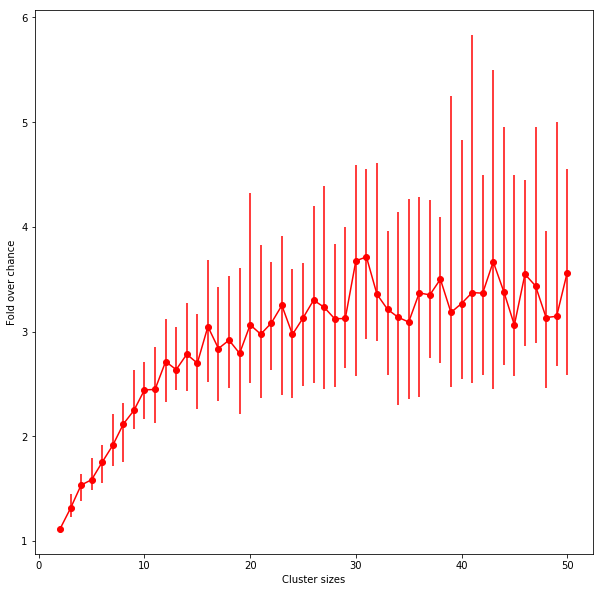

In [10]:
# all outcomes and biomarkers


path = '/Users/ahyeon/Desktop/activ misc/gose1and2_shuffled_results.h5'
f = h5py.File(path, 'r')
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc


plt.rcParams["figure.figsize"] = [10,10]
cmap = plt.get_cmap("tab10")
lower = np.asarray([np.percentile(fold_over_chance[i,:], 25) for i in range(49)])
upper = np.asarray([np.percentile(fold_over_chance[i,:], 75) for i in range(49)])
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(49)]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(49)]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(49)]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(49)]
yerr = upper-lower
rel_iqr = yerr/med

# plt.ylim((1, 4.5))
plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')
# plt.errorbar(cluster_sizes, raw_med, yerr=[raw_med-raw_lower,raw_upper-raw_med], color='black',fmt='-o', label='Raw accuracy')
# plt.errorbar(cluster_sizes, norm_med, yerr=[norm_med-norm_lower, norm_upper-norm_med], color='grey',fmt='-o', label='Chance accuracy')


# plt.title("GOSE 1 and 2 Patients Included and Shuffled\n275 Patients Total\nFold over Chance by cluster size across all iterations", fontsize=20)
plt.xlabel("Cluster sizes")
plt.ylabel("Fold over chance")

plt.savefig('/Users/ahyeon/Desktop/activ misc/gose12_foc.pdf')

/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


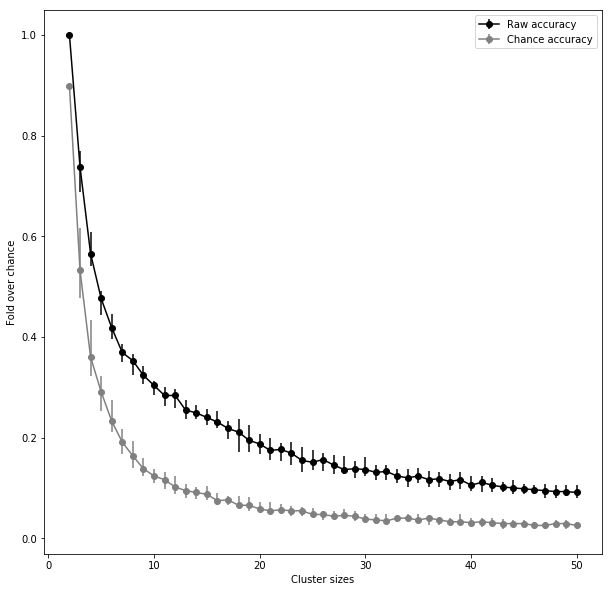

In [6]:
# all outcomes and biomarkers


path = '/Users/ahyeon/Desktop/activ misc/gose1and2_shuffled_results.h5'
f = h5py.File(path, 'r')
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc


plt.rcParams["figure.figsize"] = [10,10]
cmap = plt.get_cmap("tab10")
lower = np.asarray([np.percentile(fold_over_chance[i,:], 25) for i in range(49)])
upper = np.asarray([np.percentile(fold_over_chance[i,:], 75) for i in range(49)])
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(49)]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(49)]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(49)]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(49)]
yerr = upper-lower

plt.errorbar(cluster_sizes, raw_med, yerr=[raw_med-raw_lower,raw_upper-raw_med], color='black',fmt='-o', label='Raw accuracy')
plt.errorbar(cluster_sizes, norm_med, yerr=[norm_med-norm_lower, norm_upper-norm_med], color='grey',fmt='-o', label='Chance accuracy')


# plt.title("GOSE 1 and 2 Patients Included and Shuffled\n275 Patients Total\nFold over Chance by cluster size across all iterations", fontsize=20)
plt.xlabel("Cluster sizes")
plt.ylabel("Fold over chance")
plt.legend()

plt.savefig('/Users/ahyeon/Desktop/activ misc/gose12_raw_chance.pdf')

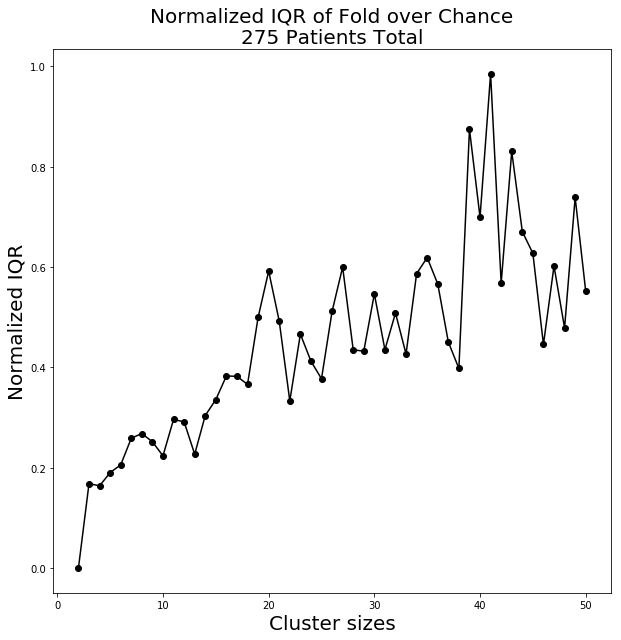

In [11]:
plt.plot(cluster_sizes, rel_iqr, '-o', color='black')
plt.title("Normalized IQR of Fold over Chance\n275 Patients Total", fontsize=20)
plt.xlabel("Cluster sizes", fontsize=20)
plt.ylabel("Normalized IQR", fontsize=20)
plt.savefig('/Users/ahyeon/Desktop/activ misc/IQR_gose1and2_shuffled.pdf')

In [9]:
275-247

28